# Collaborative Competition Project

This project is an example of multi-agent reinforcement learning.  Two agents learn to play tennis against each other, with the goal to keep hitting the ball back and forth to each other for as long as possible.

## Implementation
Starting from the hints in the project description, I decided to use the DDPG agent that I developed for the continuous control project 2.  This agent is based on the methods described in this [paper](https://arxiv.org/abs/1509.02971).  The insight that allows this agent to be almost directly used to solve this environment is the fact that each agent has its own independent local observation of the state with respect to itself, each agent is trying to learn how to do the exact same thing, and each agent does not need to take into account the actions or state of the other agent.  If, for example, the agents were trying to beat each other at tennis, the situation would be much different.  In such a case, it's been shown that naive implementation of indepdent agents is not a generally applicable strategy, because the state becomes non-stationary as each agent makes its actions.  However in the present case, the multi-agent aspect of the environment simply allows us to gather experiences for two agents per time step instead of one.

The only change to the agent compared to Project 2 was that the actions were selected for each agent in the state, and then the experiences are added to memory one at a time.  Very small changes were made to the training loop to account for the fact that the episode score is the maximum over the two agents.

```python
    # perform an action for each agent
    action = [self.network.act(state) for state in self.state]
    next_state, reward, done = self.env.step(action)

    if not skip_training:
        # Save the experience to the memory buffer, for each agent
        for s,a,r,n,d in zip(self.state, action, reward, next_state, done):
            self.memory.add(s, a, r, n, d)

```

## Directions for Improvement
  - The agents take a long time to exhibit any learning, about 4000 episodes.  The use of some noise in the exploration noise could have helped to find good actions faster.
  - Perhaps the batch normalization could have helped speed up training.
  - I've never yet played with initializing the weights of the networks to see how this affects training speed.
  - There are many other algorithms that would be interesting to try, such as a policy based agent.
  - I am interested in other more challenging multi-agent environments, that might make use of the strategy outlined in this [paper](https://proceedings.neurips.cc/paper/2017/file/68a9750337a418a86fe06c1991a1d64c-Paper.pdf).
## Results
The successful training of the agents is shown in the plot below.

In [13]:
import matplotlib.pyplot as plt
import torch
import numpy as np

SMALL_SIZE = 6
BIGGER_SIZE = 10
plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.dpi"] = 300
plt.rcParams['figure.autolayout'] = False
plt.rcParams['font.family'] = 'serif'
plt.rcParams['lines.linewidth'] = 1.0
plt.rcParams['lines.markersize'] = 5
params = {
    'figure.figsize': (3, 2),
    # controls default text sizes
    'font.size': SMALL_SIZE,
    # fontsize of the axes title
    'axes.titlesize': SMALL_SIZE,
    # fontsize of the x and y labels
    'axes.labelsize': SMALL_SIZE,
    'xtick.labelsize': SMALL_SIZE,
    'ytick.labelsize': SMALL_SIZE,
    'legend.fontsize': SMALL_SIZE,
    'figure.titlesize': BIGGER_SIZE
}
plt.rcParams.update(params)

In [18]:
good_network_metrics = torch.load('checkpoint - best.pth')['metrics']

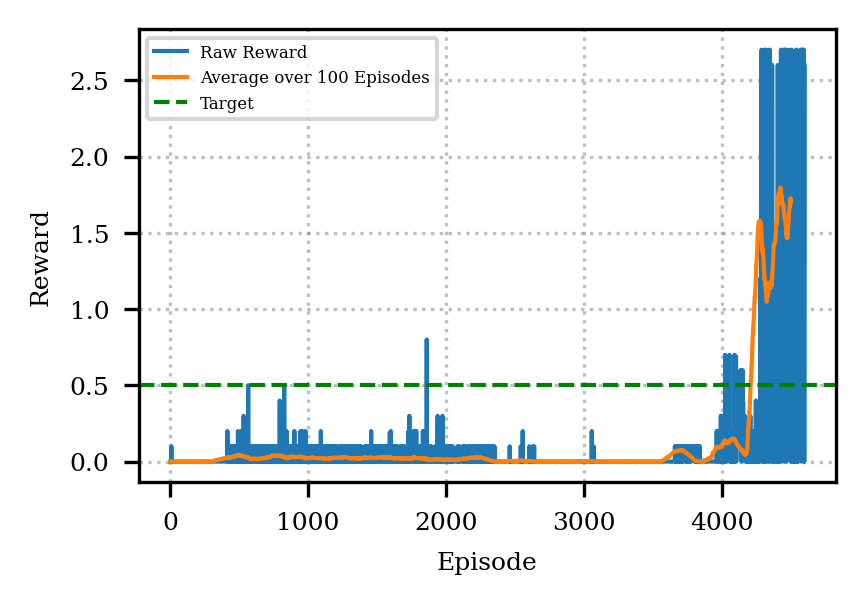

In [19]:
running_average = []
avg_size = 100
for i in range(avg_size, len(good_network_metrics)):
    running_average.append(np.mean(good_network_metrics[i-avg_size:i]))

fig,ax = plt.subplots(figsize=(3,2))
ax.plot(good_network_metrics, label='Raw Reward')
ax.plot(running_average, label='Average over 100 Episodes')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.grid(True, linestyle=':', color='grey', alpha=0.5)
ax.axhline(y=0.5, linestyle='--', color='g', label='Target')
ax.legend(fontsize=4)